# 추측통계의 기본

## 모집단과 표본

### 표본의 추출방법

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision

pd.set_option('precision', 3)

%matplotlib inline


In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 구글 드라이브에서 파일 가져오기


Mounted at /content/drive


In [41]:
df = pd.read_csv('/content/drive/MyDrive/파이썬/누구나 파이썬 통계분석/python_stat_sample-master/data/ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80])

In [42]:
np.random.choice([1,2,3],3)

array([3, 1, 2])

In [43]:
# 무작위 추출 = 임의로 표본 추출
# 복원추출 : 여러 차례 동일한 표본을 선택하는 방법
np.random.choice([1,2,3],3)

array([2, 2, 2])

In [44]:
# 비복원추출 = 동일한 표본은 한번만 선택하는 방법 / 복원추출+replace=False
np.random.choice([1,2,3],3,replace = False)

array([3, 2, 1])

In [45]:
# seed 를 0으로 하는 무작위 추출은 한번 임의로 추출되는 값으로 매번 동일한 결과를 가져옴
np.random.seed(0)
np.random.choice([1,2,3],6)

array([1, 2, 1, 2, 2, 3])

In [46]:
# 표본은 랜덤으로 추출한 값이지만 지속적으로 그 값을 사용해야하기 때문에 
# seed를 이용해서 랜덤으로 추출한 표본값을 고정시킴

np.random.seed(0)
sample = np.random.choice(scores,20)
sample.mean()

70.4

In [47]:
scores.mean()

69.53

In [48]:
# sample은 모집단에서 표본으로 20개의 값만 이용했다면
# scores는 모집단 전체의 값으로 평균을 냄
scores.mean()

69.53

In [51]:
for i in range(5):
  sample = np.random.choice(scores,20)
  print(f'{i+1}번째 무작위추출로 얻은 표본평균', sample.mean())

# f'{i+1}' 은 i에 0부터 시작하는 숫자의 5개를 넣으므로 0~4가 들어가는데 
# +1을 해줌으로 처음 시작 숫자를 1로 세팅해주는 것과 같음
# 출력의 문자열 처음에 붙는 숫자를 표현하기 위해 사용됨 

1번째 무작위추출로 얻은 표본평균 72.45
2번째 무작위추출로 얻은 표본평균 63.7
3번째 무작위추출로 얻은 표본평균 66.05
4번째 무작위추출로 얻은 표본평균 71.7
5번째 무작위추출로 얻은 표본평균 74.15


## 확률 모델

### 확률의 기본

### 확률분포

In [52]:
dice = [1,2,3,4,5,6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

In [99]:
num_trial = 100
sample = np.random.choice(dice, num_trial, p=prob) #p= prob 
sample

# num_trial 은 랜덤 초이스로 (주사위[1~6], 시행횟수(100), 확률(p=prob))

array([5, 6, 6, 2, 5, 6, 6, 3, 6, 3, 6, 1, 2, 5, 4, 2, 6, 6, 3, 4, 5, 5,
       6, 2, 1, 5, 4, 3, 2, 2, 6, 4, 4, 1, 4, 5, 5, 6, 5, 4, 4, 6, 6, 3,
       5, 5, 4, 5, 2, 5, 1, 6, 5, 6, 1, 6, 6, 6, 6, 4, 6, 6, 6, 5, 4, 5,
       3, 1, 1, 3, 5, 3, 4, 2, 6, 6, 6, 4, 5, 4, 4, 2, 4, 4, 3, 4, 2, 6,
       5, 3, 6, 5, 4, 5, 3, 5, 2, 3, 5, 2])

In [93]:

sample

array([2, 1, 6, 2, 6, 6, 6, 5, 4, 6, 5, 4, 3, 4, 6, 5, 3, 3, 5, 5, 4, 3,
       3, 2, 5, 2, 6, 2, 6, 6, 2, 4, 4, 5, 6, 1, 6, 6, 1, 4, 3, 5, 6, 5,
       2, 5, 6, 3, 6, 2, 2, 5, 6, 6, 4, 6, 6, 4, 2, 4, 4, 5, 6, 5, 5, 5,
       2, 2, 2, 2, 3, 6, 5, 5, 5, 5, 1, 5, 6, 4, 5, 6, 3, 4, 1, 4, 6, 6,
       5, 4, 4, 6, 2, 5, 4, 5, 6, 6, 5, 4])

In [126]:
freq, _ = np.histogram(sample, bins=100, range=(0,100))
                                      # bins = 계급수
                                      # range = 계급폭 (최소값, 최대값) 

freq

array([ 0,  7, 12, 12, 19, 23, 27,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [127]:
freq, _ = np.histogram(sample, bins=6, range=(1,6))
                                      # bins = 계급수
                                      # range = 계급폭 (최소값, 최대값) 

freq

array([ 7, 12, 12, 19, 23, 27])

In [144]:
#rel_freq = freq / num_trial
rel_freq = freq/freq.sum()
rel_freq

array([0.07, 0.12, 0.12, 0.19, 0.23, 0.27])

In [140]:
dice_data = pd.DataFrame({
    'frequency':freq,
    'relative frequency':freq / num_trial},
    index=pd.Index(dice, name='dice'))
dice_data

,frequency,relative frequency
dice,,
1,7,0.07
2,12,0.12
3,12,0.12
4,19,0.19
5,23,0.23
6,27,0.27


In [ ]:
freq, _ = 

,frequency,relative frequency
dice,,
1,5,0.05
2,9,0.09
3,13,0.13
4,27,0.27
5,19,0.19
6,27,0.27


(array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0025,
        0.    , 0.    , 0.    , 0.    , 0.0025, 0.0025, 0.    , 0.0025,
        0.    , 0.    , 0.0025, 0.    , 0.    , 0.    , 0.0025, 0.    ,
        0.0025, 0.005 , 0.0075, 0.0075, 0.    , 0.0125, 0.0125, 0.0075,
        0.005 , 0.015 , 0.01  , 0.    , 0.0225, 0.0025, 0.02  , 0.025 ,
        0.02  , 0.025 , 0.02  , 0.0125, 0.015 , 0.0325, 0.015 , 0.035 ,
        0.0225, 0.02  , 0.015 , 0.0325, 0.04  , 0.0275, 0.025 , 0.0175,
        0.0225, 0.02  , 0.025 , 0.0175, 0.035 , 0.025 , 0.0325, 0.025 ,
        0.025 , 0.02  , 0.0175, 0.0225, 0.0075, 0.015 , 0.0225, 0.0125,
        0.005 , 0.0075, 0.0125, 0.02  , 0.015 , 0.01  , 0.0075, 0.    ,
        0.0125, 0.005 , 0.0025, 0.0125]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12., 

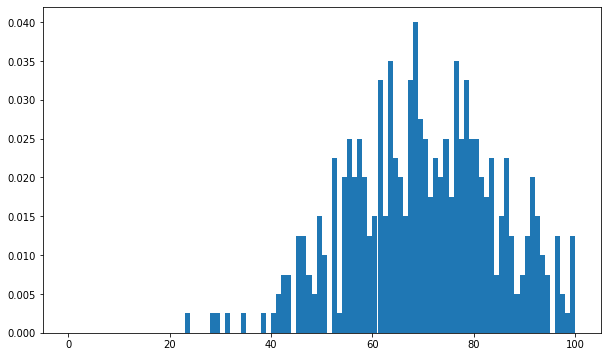

In [156]:
# 계급폭을 1점으로 하는 히스토그램
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(scores, bins= 100, range=(0,100), density=True)

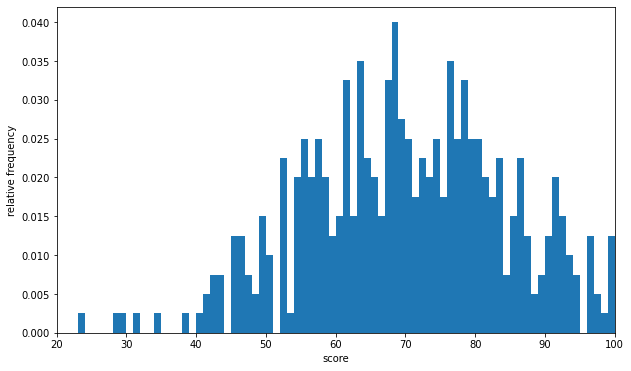

In [120]:
# 계급폭을 1점으로 하는 히스토그램
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(scores, bins= 100, range=(0,100), density=True)

ax.set_xlim(20,100)
ax.set_ylim(0, 0.042)

ax.set_xlabel('score')
ax.set_ylabel('relative frequency')

plt.show()
# 파이썬에선 에디터에서는 꼭 기입해줘야 그래프를 볼 수 있지만
# 쥬피터 노트북이나 colab에선 굳이 안해줘도 그래프가 출력된다
  

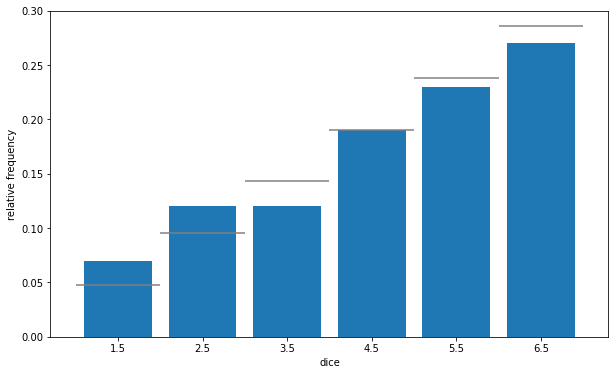

In [152]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.hist(sample, bins=6, range=(1,7), density=True, rwidth=0.8)


# 실제의 확률분포를 가로선으로 표시

ax.hlines(prob, np.arange(1,7), np.arange(2,8), color='gray')

# 막대 그래프의 [1.5, 2.5, ..., 6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5,6.5,6))

# 주사위 눈의 값은 [1, 2, 3, 4, 5, 6]

ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')

plt.show()

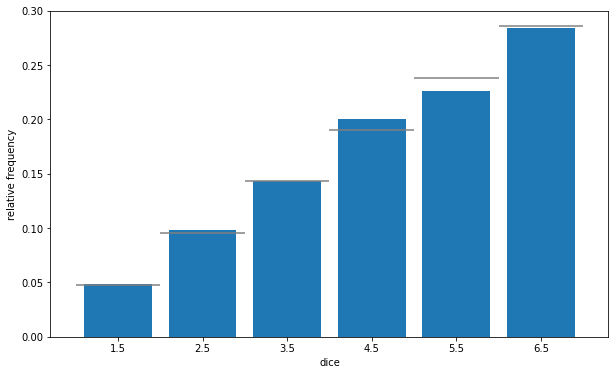

In [159]:
num_trial = 10000
sample = np.random.choice(dice, num_trial, p=prob) #p= prob 

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.hist(sample, bins=6, range=(1,7), density=True, rwidth=0.8)


# 실제의 확률분포를 가로선으로 표시

ax.hlines(prob, np.arange(1,7), np.arange(2,8), color='gray')

# 막대 그래프의 [1.5, 2.5, ..., 6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5,6.5,6))

# 주사위 눈의 값은 [1, 2, 3, 4, 5, 6]

ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')

plt.show()

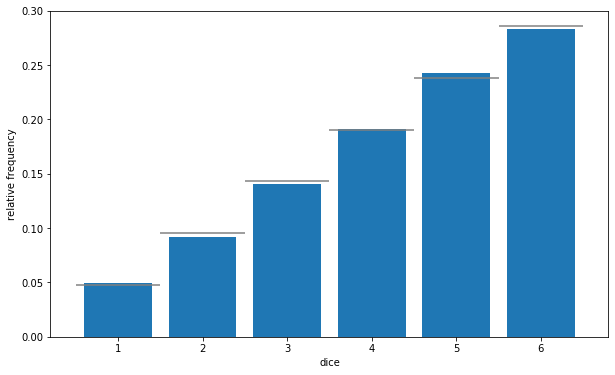

In [ ]:

plt.show()

## 추측통계에서의 확률

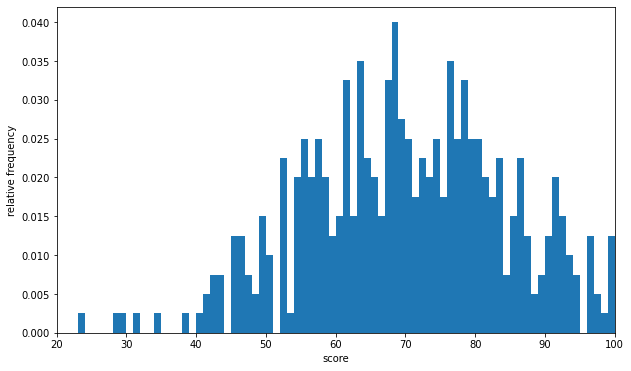

In [160]:
# 계급폭을 1점으로 하는 히스토그램
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(scores, bins= 100, range=(0,100), density=True)

ax.set_xlim(20,100)
ax.set_ylim(0, 0.042)

ax.set_xlabel('score')
ax.set_ylabel('relative frequency')

plt.show()
# 파이썬에선 에디터에서는 꼭 기입해줘야 그래프를 볼 수 있지만
# 쥬피터 노트북이나 colab에선 굳이 안해줘도 그래프가 출력된다
  

In [161]:

plt.show()

In [125]:
np.random.choice(scores)

62

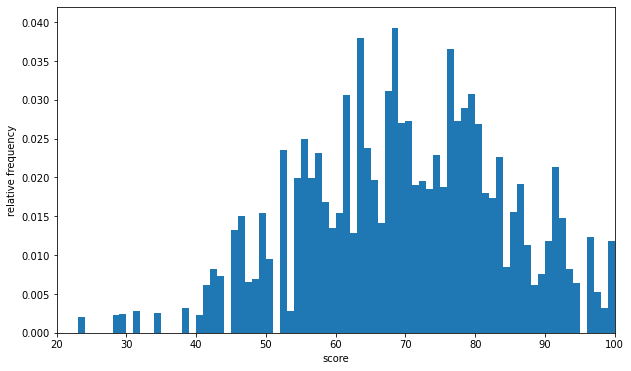

In [133]:
# 시행횟수를 늘리면 주사위의 상대도수는 실제의 확률분포에 가까워짐
#무작위추출에서도 표본의 크기가 커지면, 표본 데이터의 상대도수는 실제의 확률 분포에 근사
#무작위 추출로 샘플 사이즈가 10000인 표본 추출

sample1 = np.random.choice(scores, 10000)
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)

ax.hist(sample1, bins=100, range=(0,100), density=True)
ax.set_xlim(20,100)
ax.set_ylim(0, 0.042)

ax.set_xlabel('score')
ax.set_ylabel('relative frequency')

plt.show()

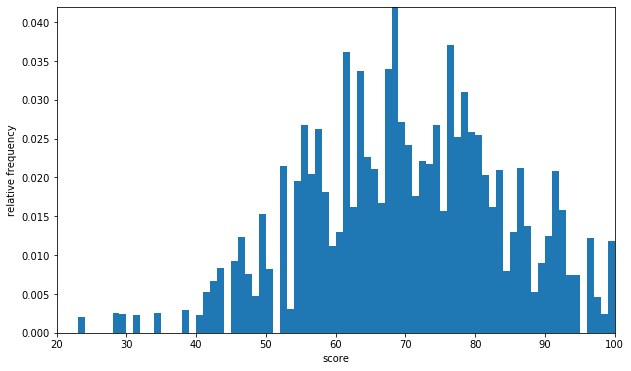

In [ ]:

plt.show()

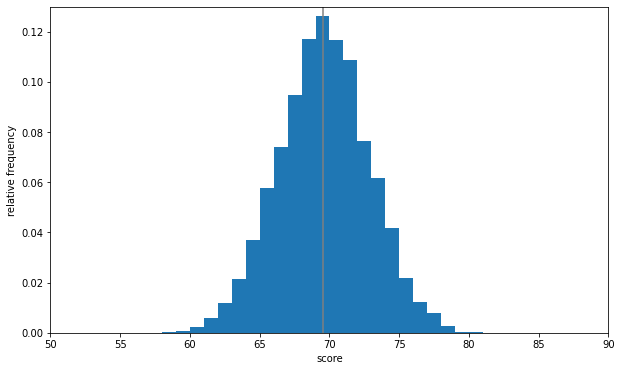

In [162]:
sample_means = [np.random.choice(scores, 20).mean() for _ in range(10000)]
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0,100), density=True)

# 모평균을 세로선으로 표시
ax.vlines(np.mean(scores), 0, 1, 'gray')

ax.set_xlim(50,90)
ax.set_ylim(0,0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')

plt.show()

## 이제부터 배우는 것